In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/Andy/Documents/Instacart Basket Analysis/'

In [3]:
path

'/Users/Andy/Documents/Instacart Basket Analysis/'

In [5]:
insta_filtered=pd.read_pickle(os.path.join(path, '02 Data\Prepared Data\insta_cleaned.pkl'))

In [6]:
insta_filtered.loc[(insta_filtered['state'] =='Maine') 
                  | (insta_filtered['state'] == 'New Hampshire') 
                  | (insta_filtered['state'] == 'Vermont')
                  | (insta_filtered['state'] == 'Massachusetts')
                  | (insta_filtered['state'] == 'Rhode Island')
                  | (insta_filtered['state'] == 'Connecticut')
                  | (insta_filtered['state'] == 'New York')
                  | (insta_filtered['state'] == 'Pennsylvania')
                  | (insta_filtered['state'] == 'New Jersey'), 'Region'] = 'Northeast'

In [7]:
insta_filtered.loc[(insta_filtered['state'] == 'Wisconsin') 
                  | (insta_filtered['state'] == 'Michigan') 
                  | (insta_filtered['state'] == 'Illinois')
                  | (insta_filtered['state'] == 'Indiana')
                  | (insta_filtered['state'] == 'Ohio')
                  | (insta_filtered['state'] == 'North Dakota')
                  | (insta_filtered['state'] == 'South Dakota')
                  | (insta_filtered['state'] == 'Nebraska') 
                  | (insta_filtered['state'] == 'Kansas')
                  | (insta_filtered['state'] == 'Minnesota')
                  | (insta_filtered['state'] == 'Iowa')
                  | (insta_filtered['state'] == 'Missouri'), 'Region'] = 'Midwest'

In [8]:
insta_filtered.loc[(insta_filtered['state'] =='Delaware') 
                  | (insta_filtered['state'] == 'Maryland') 
                  | (insta_filtered['state'] == 'District of Columbia')
                  | (insta_filtered['state'] == 'Virginia')
                  | (insta_filtered['state'] == 'West Virginia')
                  | (insta_filtered['state'] == 'North Carolina')
                  | (insta_filtered['state'] == 'South Carolina')
                  | (insta_filtered['state'] == 'Georgia')
                  | (insta_filtered['state'] == 'Florida') 
                  | (insta_filtered['state'] == 'Kentucky')
                  | (insta_filtered['state'] == 'Tennessee')
                  | (insta_filtered['state'] == 'Mississippi') 
                  | (insta_filtered['state'] == 'Alabama')
                  | (insta_filtered['state'] == 'Oklahoma')
                  | (insta_filtered['state'] == 'Texas')
                  | (insta_filtered['state'] == 'Arkansas')
                  | (insta_filtered['state'] == 'Louisiana'), 'Region'] = 'South'

In [9]:
insta_filtered.loc[(insta_filtered['state'] =='Idaho') 
                  | (insta_filtered['state'] == 'Montana') 
                  | (insta_filtered['state'] == 'Wyoming')
                  | (insta_filtered['state'] == 'Nevada')
                  | (insta_filtered['state'] == 'Utah')
                  | (insta_filtered['state'] == 'Colorado')
                  | (insta_filtered['state'] == 'Arizona')
                  | (insta_filtered['state'] == 'New Mexico') 
                  | (insta_filtered['state'] == 'Alaska')
                  | (insta_filtered['state'] == 'Washington')
                  | (insta_filtered['state'] == 'Oregon') 
                  | (insta_filtered['state'] == 'California')
                  | (insta_filtered['state'] == 'Hawaii')
                  , 'Region'] = 'West'

In [10]:
insta_filtered['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
insta_filtered['Region'].describe()

count     32404859
unique           4
top          South
freq      10791885
Name: Region, dtype: object

In [12]:
insta_filtered['Region'].isnull().sum()

0

In [13]:
region_flag_counts = insta_filtered.groupby(['Region', 'spending_flag']).size().unstack(fill_value=0)


In [14]:
region_flag_counts

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [15]:
crosstab = pd.crosstab(insta_filtered['Region'], insta_filtered['spending_flag'], dropna = False)

In [16]:
crosstab.to_clipboard()

In [17]:
insta_filtered[['user_id', 'spending_flag', 'state', 'Region']].head(100)

,user_id,spending_flag,state,Region
0,138,Low spender,Minnesota,Midwest
1,138,Low spender,Minnesota,Midwest
2,709,Low spender,Vermont,Northeast
3,764,Low spender,Wisconsin,Midwest
4,764,Low spender,Wisconsin,Midwest
...,...,...,...,...
95,10831,Low spender,Louisiana,South
96,11119,Low spender,Alabama,South
97,11186,Low spender,Kansas,Midwest
98,11243,Low spender,Nevada,West


In [18]:
df_grouped = insta_filtered.groupby(['Region', 'spending_flag']).size().unstack()

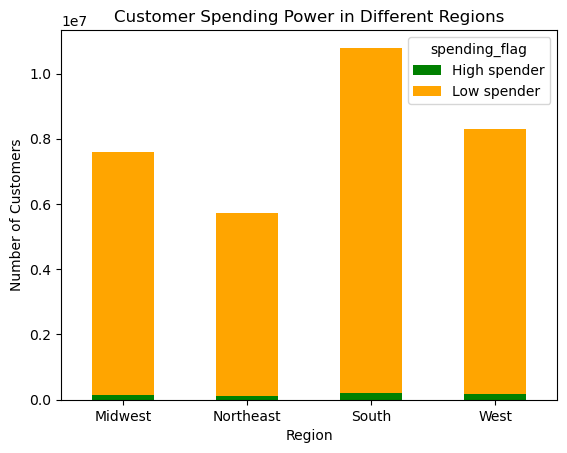

In [19]:
colors = ['green', 'orange']
bar_spender_region = df_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [20]:
bar_spender_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_region.png'))

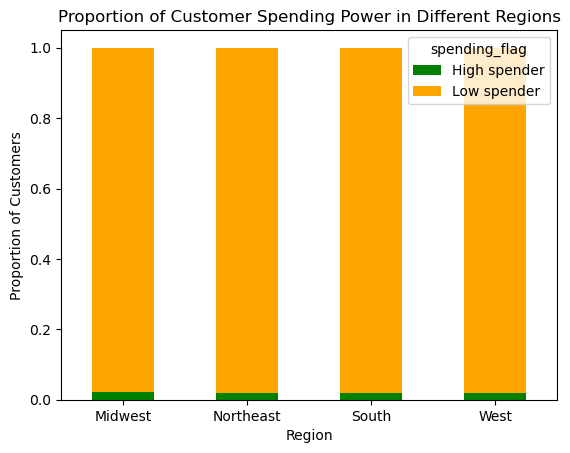

In [21]:
df_prop_grouped = df_grouped.div(df_grouped.sum(axis = 1), axis = 0)
bar_spender_region_prop = df_prop_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Proportion of Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.show()

In [22]:
bar_spender_region_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_region_prop.png'))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

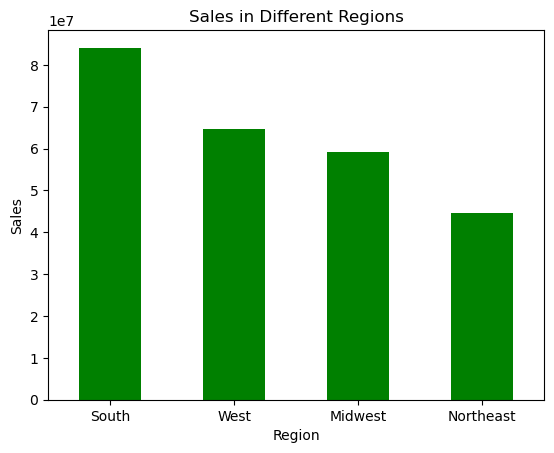

In [23]:
bar_sales_region = insta_filtered.groupby('Region')['prices'].sum().sort_values(ascending=False).plot.bar(title = 'Sales in Different Regions', xlabel = 'Region', ylabel = 'Sales', color = 'green')
plt.xticks(rotation = 0)

In [24]:
bar_sales_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_region.png'))

In [25]:
insta_filtered['max_order'] = insta_filtered.groupby(['user_id'])['order_number'].transform('max')

In [26]:
insta_filtered.loc[insta_filtered['max_order'] < 5, 'low_activity'] = 'True'
insta_filtered.loc[insta_filtered['max_order'] >= 5, 'low_activity'] = 'False'

In [27]:
insta_filtered['low_activity'].value_counts()

low_activity
False    30964564
True      1440295
Name: count, dtype: int64

In [28]:
# Create a new data set which only contains active customers (orders >= 5)
insta_filtered_active = insta_filtered[insta_filtered['low_activity'] == 'False']

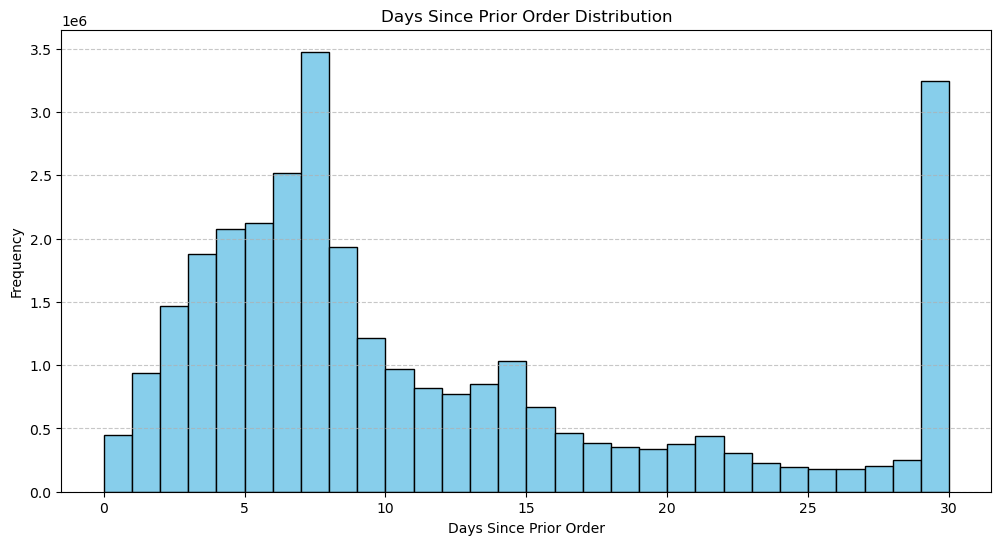

In [29]:
#  how often customers place orders in terms of the number of days since their prior order.
plt.figure(figsize=(12, 6))
plt.hist(insta_filtered['days_since_prior_order'], bins=30, color='skyblue', edgecolor='black')
plt.title('Days Since Prior Order Distribution')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
#bar_orders_interval_loyalty = .groupby('loyalty_flag')['days_since_prior_order'].mean().plot.bar(title = 'Orders interval for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Days since Prior Order', color = 'green')
#plt.xticks(rotation=0)

In [31]:
#bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

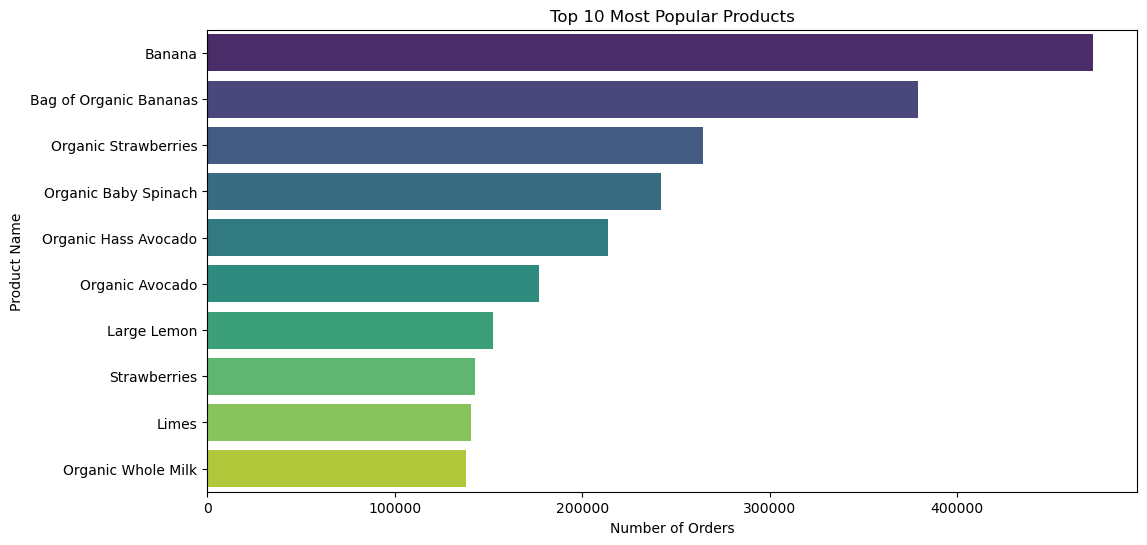

In [32]:
# Identify most popular products using a bar plot
plt.figure(figsize=(12, 6))
top_products = insta_filtered['product_name'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()

In [33]:
insta_filtered['Customer_Profile'] = pd.cut(insta_filtered['age'], bins=[0, 25, 35, 50, 100], labels=['Young Adult', 'Adult', 'Middle-Aged', 'Senior'])

In [34]:
insta_filtered['Customer_Profile'] = insta_filtered['Customer_Profile'].astype(str)


In [35]:
insta_filtered.loc[(insta_filtered['income'] < 50000), 'Customer_Profile'] += ' Low Income'


In [36]:
insta_filtered.loc[(insta_filtered['income'] >= 100000), 'Customer_Profile'] = 'High Income ' + insta_filtered['Customer_Profile']


In [37]:
insta_filtered.loc[insta_filtered['n_dependants'] > 2, 'Customer_Profile'] = 'Family'


In [38]:
insta_filtered.loc[insta_filtered['loyalty_flag'] == 'Loyal', 'Customer_Profile'] = 'Loyal Customer'


In [39]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

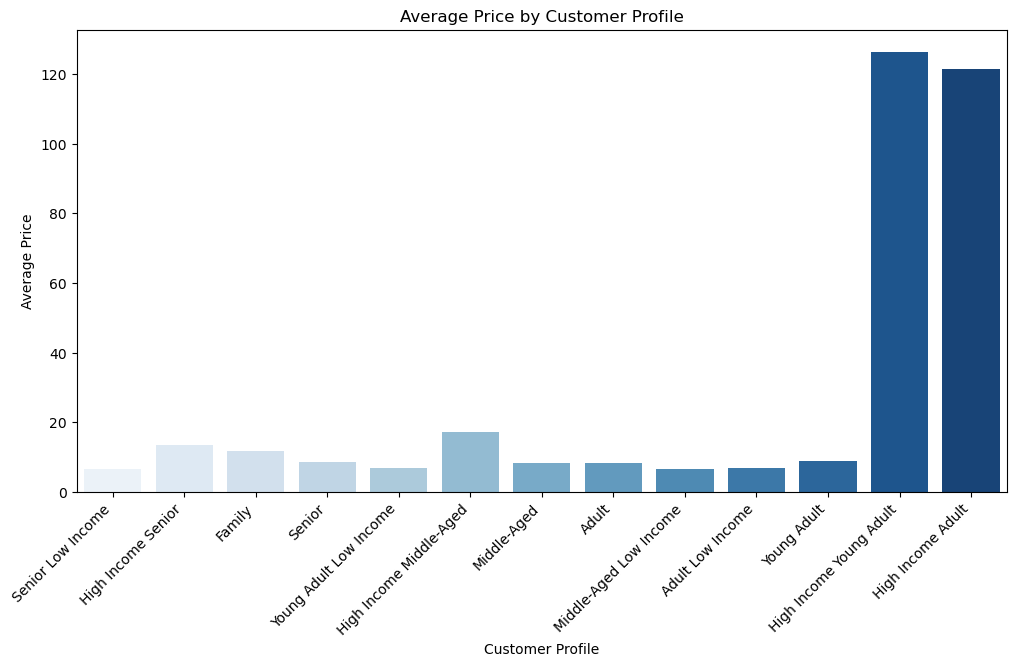

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_Profile', y='average_price', data=insta_filtered, errorbar=None, palette='Blues')
plt.title('Average Price by Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

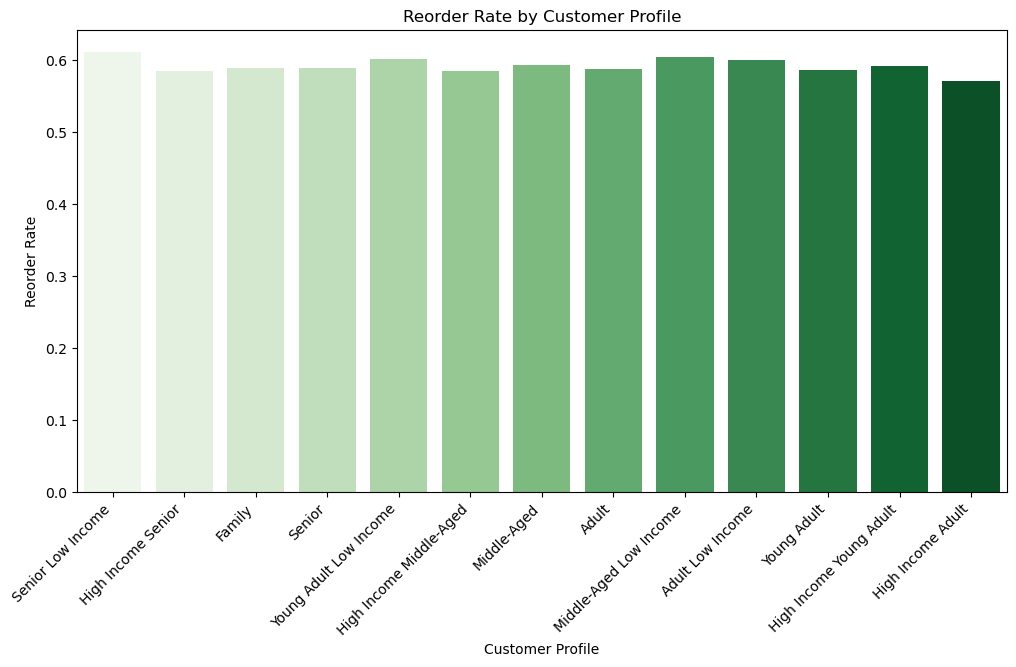

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_Profile', y='reordered', data=insta_filtered, errorbar=None, palette='Greens')
plt.title('Reorder Rate by Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Reorder Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
# Create a DataFrame with relevant columns
df_age_loyalty = insta_filtered[['age', 'loyalty_flag']]

In [47]:
# Bin age into groups
age_bins = [0, 25, 35, 50, 100]
age_labels = ['18-25', '26-35', '36-50', '51+']
df_age_loyalty['age_group'] = pd.cut(df_age_loyalty['age'], bins=age_bins, labels=age_labels)

C:\Users\Andy\AppData\Local\Temp\ipykernel_12956\4288743003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_loyalty['age_group'] = pd.cut(df_age_loyalty['age'], bins=age_bins, labels=age_labels)


In [55]:
df_age_loyalty = pd.DataFrame(np.random.rand(4, 3), columns=['New', 'Returning', 'Loyal'])


In [56]:
df_age_loyalty.index = ['18-25', '26-35', '36-45', '46+']


In [58]:
yerr = np.random.rand(4, 3) / 10


In [60]:
plt.errorbar(x, y, yerr=0.1, fmt='-o') # use a scalar value for yerr


NameError: name 'x' is not defined

<Figure size 1200x800 with 0 Axes>

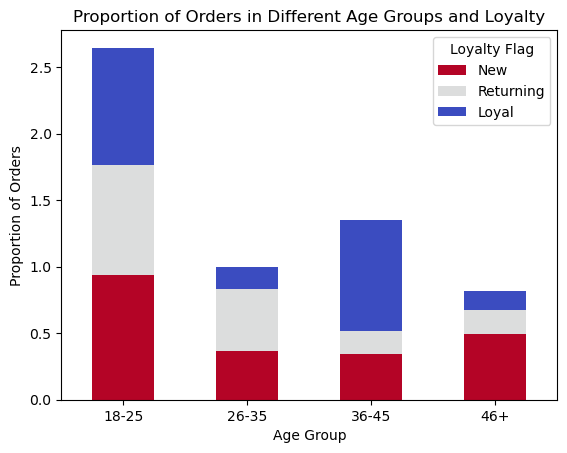

In [61]:
plt.figure(figsize=(12, 8))
df_age_loyalty.plot(kind='bar', stacked=True, colormap='coolwarm_r',)
plt.title('Proportion of Orders in Different Age Groups and Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Orders')
plt.xticks(rotation=0)
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1, 1))
plt.show() 

What’s the distribution among users in regards to their brand loyalty (i.e., how
often do they return to Instacart)?


(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

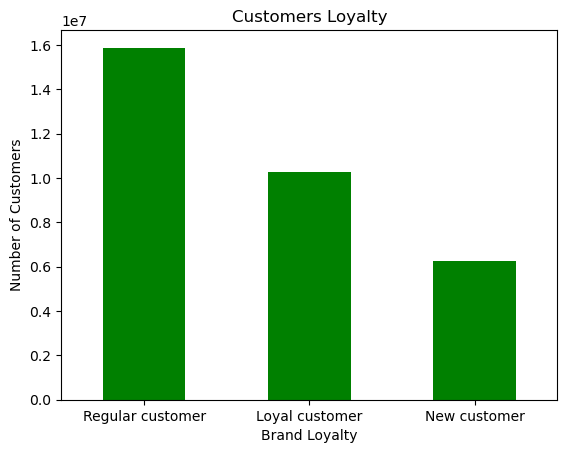

In [64]:
# Create a bar chart showing the number of orders regarding their brand loyalty
bar_orders_loyalty = insta_filtered['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Brand Loyalty', ylabel = 'Number of Customers', color = 'green')
plt.xticks(rotation=0)

In [65]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

In [70]:
print(insta_filtered.columns)


Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'hour_of_day_ordered', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_orders', 'order_frequency_flag',
       'mean_expenses', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'Region',
       'low_activity', 'Customer_Profile'],
      dtype='object')


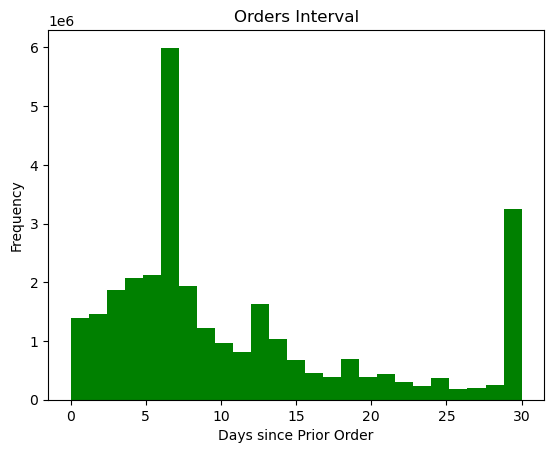

In [72]:
# Create a histogram to check how often do our customers return to Instacart?
hist_orders_interval = insta_filtered['days_since_prior_order'].plot.hist(bins = 25, title = 'Orders Interval', xlabel = 'Days since Prior Order', color = 'green')

In [73]:
# Export the chart outside of Jupyter in the form of image file
hist_orders_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_interval.png'))

Are there differences in ordering habits based on a customer’s loyalty status?


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

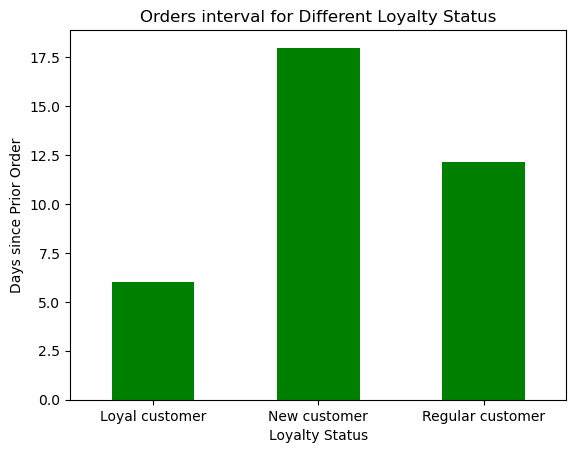

In [75]:
bar_orders_interval_loyalty = insta_filtered.groupby('loyalty_flag')['days_since_prior_order'].mean().plot.bar(title = 'Orders interval for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Days since Prior Order', color = 'green')
plt.xticks(rotation=0)

In [76]:
# Export the chart outside of Jupyter in the form of image file
bar_orders_interval_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_interval_loyalty.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

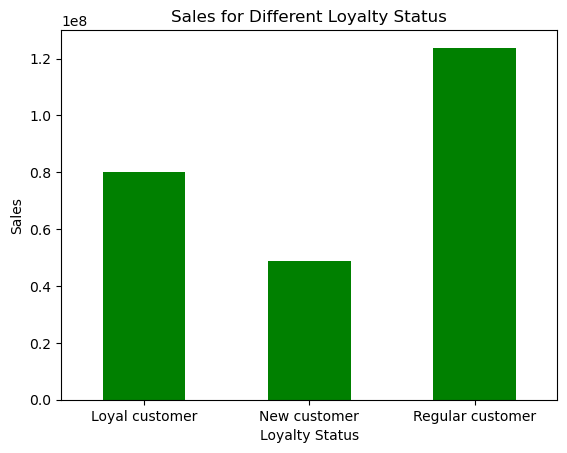

In [77]:
bar_sales_loyalty = insta_filtered.groupby('loyalty_flag')['prices'].sum().plot.bar(title = 'Sales for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Sales', color = 'green')
plt.xticks(rotation=0)

In [78]:
# Export the chart outside of Jupyter in the form of image file
bar_sales_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_loyalty.png'))

Which day has the most orders? Filtering by diifferent flags

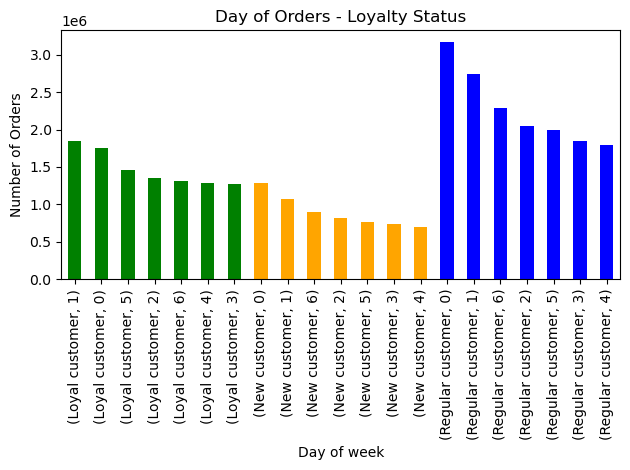

In [79]:
bar_dow_loyalty = insta_filtered.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['green','green','green','green','green','green','green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.tight_layout()

In [80]:
insta_filtered.groupby('loyalty_flag')['orders_day_of_week'].value_counts()

loyalty_flag      orders_day_of_week
Loyal customer    1                     1843401
                  0                     1754731
                  5                     1456715
                  2                     1352343
                  6                     1318366
                  4                     1292042
                  3                     1266495
New customer      0                     1280451
                  1                     1067446
                  6                      895745
                  2                      814412
                  5                      759780
                  3                      731417
                  4                      694739
Regular customer  0                     3169000
                  1                     2749383
                  6                     2282379
                  2                     2047075
                  5                     1989296
                  3                     1842622
   

In [81]:
# Export the chart outside of Jupyter in the form of image file
bar_dow_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_loyalty.png'))

In [83]:
# Create a dataframe of order_hour_of_day of different loyalty customers
df_oh_loyalty = insta_filtered.groupby('loyalty_flag')['hour_of_day_ordered'].value_counts()

In [84]:
# Check the top 3 ordering hours of New customer
df_oh_loyalty['New customer'].head(3)

hour_of_day_ordered
15    540461
13    531525
14    531180
Name: count, dtype: int64

In [85]:
# Check the top 3 ordering hours of Regular customer
df_oh_loyalty['Regular customer'].head(3)

hour_of_day_ordered
11    1339172
10    1329666
14    1322794
Name: count, dtype: int64

In [86]:
# Check the top 3 ordering hours of Loyal customer
df_oh_loyalty['Loyal customer'].head(3)

hour_of_day_ordered
10    937669
9     882740
11    873024
Name: count, dtype: int64

Which department has the most orders?

In [87]:
# create a column called 'result' to indicate department name
result = []

for value in insta_filtered["department_id"]:
    if value == 1:
        result.append("frozen")
    elif value == 2:
        result.append("other")
    elif value == 3:
        result.append("bakery")
    elif value == 4:
        result.append("produce")
    elif value == 5:
        result.append("alchol")
    elif value == 6:
        result.append("international")
    elif value == 7:
        result.append("beverages")
    elif value == 8:
        result.append("pets")
    elif value == 9:
        result.append("dry goods pasta")
    elif value == 10:
        result.append("bulk")
    elif value == 11:
        result.append("personal care")
    elif value == 12:
        result.append("meat seafood")
    elif value == 13:
        result.append("pantry")
    elif value == 14:
        result.append("breakfast")
    elif value == 15:
        result.append("canned goods")
    elif value == 16:
        result.append("dairy eggs")
    elif value == 17:
        result.append("household")   
    elif value == 18:
        result.append("babies")
    elif value == 19:
        result.append("snacks")
    elif value == 20:
        result.append("deli")
    else:
        result.append("missing")

In [88]:
insta_filtered['department_name'] = result

In [89]:
insta_filtered['department_name'].value_counts(dropna = False)

department_name
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alchol              153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [90]:
insta_filtered['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [91]:
# Create a dataframe to group the data by 'department_name' and 'loyalty_flag'
df_grouped_dep_loyal = insta_filtered.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [92]:
df_grouped_dep_loyal.head()

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alchol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094


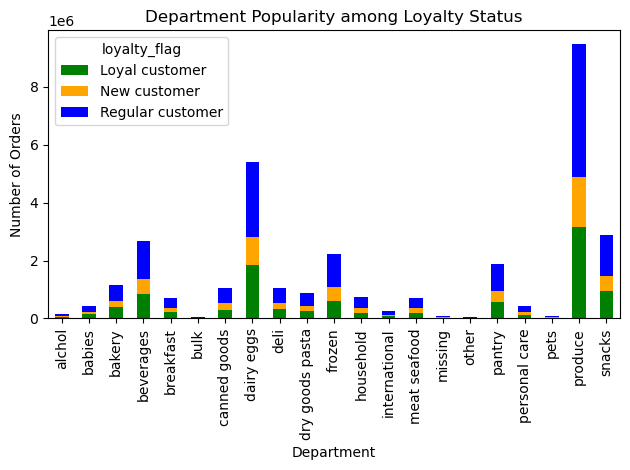

In [94]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue']
bar_dep_loyalty = df_grouped_dep_loyal.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [95]:
# Export the chart outside of Jupyter in the form of image file
bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyalty.png'))

In [96]:
df_oh_dep_loyalty = insta_filtered.groupby('loyalty_flag')['department_name'].value_counts()

In [97]:
# Check top 3 sold departments of each loyalty status
df_oh_dep_loyalty['New customer'].head(3)

department_name
produce       1736622
dairy eggs     971621
snacks         534251
Name: count, dtype: int64

In [98]:
df_oh_dep_loyalty['Regular customer'].head(3)

department_name
produce       4595293
dairy eggs    2596419
snacks        1410149
Name: count, dtype: int64

In [99]:
df_oh_dep_loyalty['Loyal customer'].head(3)

department_name
produce       3147376
dairy eggs    1830707
snacks         943150
Name: count, dtype: int64

Are there differences in ordering habits based on a customer’s region?


In [102]:
insta_filtered.groupby('Region')['days_since_prior_order'].mean()

Region
Midwest      11.181836
Northeast    11.075769
South        11.108108
West         11.047196
Name: days_since_prior_order, dtype: float64

In [103]:
insta_filtered.groupby('Region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
Region                        
Midwest    7.792584  1.0  25.0
Northeast  7.782409  1.0  25.0
South      7.794918  1.0  25.0
West       7.790356  1.0  25.0

In [104]:
insta_filtered.groupby('Region')['orders_day_of_week'].value_counts()

Region     orders_day_of_week
Midwest    0                     1460186
           1                     1320759
           6                     1058124
           2                      991770
           5                      983262
           3                      895093
           4                      888131
Northeast  0                     1097258
           1                      999953
           6                      787283
           5                      746455
           2                      746153
           3                      679308
           4                      666326
South      0                     2052776
           1                     1892057
           6                     1496781
           2                     1404662
           5                     1399737
           3                     1287335
           4                     1258537
West       0                     1593962
           1                     1447461
           6               

In [ ]:
Which day of the week had the most orders by region?

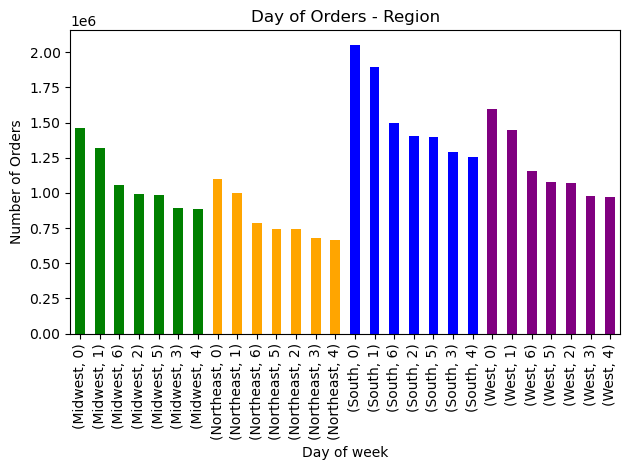

In [106]:
bar_dow_region = insta_filtered.groupby('Region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Region', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['green','green','green','green','green','green','green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple'])
plt.tight_layout()

In [107]:
# Export the chart outside of Jupyter in the form of image file
bar_dow_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_region.png'))

In [109]:
# Create a dataframe of order_hour_of_day of different regions
df_oh_region = insta_filtered.groupby('Region')['hour_of_day_ordered'].value_counts()

Checking the time of the day which had the most orders by region.

In [110]:
# Check the top 3 ordering hours of Midwest
df_oh_region['Midwest'].head(3)

hour_of_day_ordered
10    646591
11    641858
15    628164
Name: count, dtype: int64

In [111]:
# Check the top 3 ordering hours of Northeast
df_oh_region['Northeast'].head(3)

hour_of_day_ordered
10    484872
11    482845
14    475355
Name: count, dtype: int64

In [112]:
# Check the top 3 ordering hours of South
df_oh_region['South'].head(3)

hour_of_day_ordered
10    923301
11    909371
14    893190
Name: count, dtype: int64

In [113]:
# Check the top 3 ordering hours of West
df_oh_region['West'].head(3)

hour_of_day_ordered
10    706996
11    702066
14    695469
Name: count, dtype: int64

Department popularity among regions.

In [114]:
# Create a dataframe to group the data by 'department_name' and 'region'
df_grouped_dep_region = insta_filtered.groupby(['department_name', 'Region']).size().unstack()

In [115]:
df_grouped_dep_region_sort = df_grouped_dep_region.sort_values(by = 'South', ascending = False)

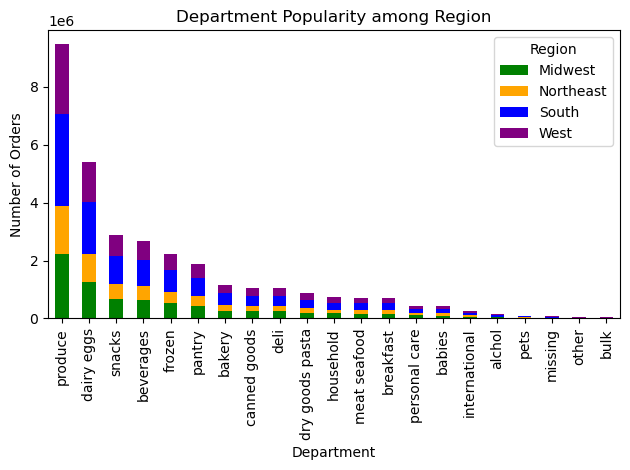

In [116]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue', 'purple']
bar_dep_region = df_grouped_dep_region_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [117]:
# Export the chart outside of Jupyter in the form of image file
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_region.png'))

Checking if theres amy connection between age and family correlations.

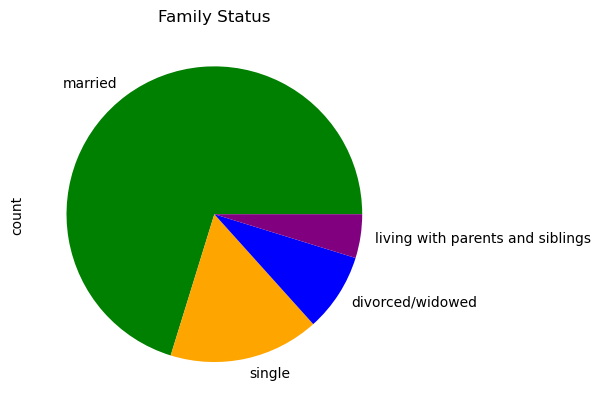

In [118]:
# Check the family status frequency
pie_fam_status = insta_filtered['fam_status'].value_counts().plot.pie(title = 'Family Status', colors = ['green', 'orange', 'blue', 'purple'])

In [119]:
# Export the chart outside of Jupyter in the form of image file
pie_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_status.png'))

From the observations married customers seems to be the majority of Instacart's customers.

In [120]:
# Divide the customers into 3 age groups:

In [121]:
age_bins = [18, 40, 60, float('inf')] 
age_labels = ['Young', 'Middle', 'Old']

In [123]:
insta_filtered['age_flag'] = np.select(
    [(insta_filtered['age'] >= 18) & (insta_filtered['age'] < 40), (insta_filtered['age'] >= 40) & (insta_filtered['age'] < 60), insta_filtered['age'] >= 60],
    age_labels,
    default=np.nan
)

In [124]:
insta_filtered.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer_Profile,department_name,age_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,81,8/1/2019,1,married,49620,Midwest,False,Senior Low Income,snacks,Old
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,81,8/1/2019,1,married,49620,Midwest,False,Senior Low Income,snacks,Old
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,66,6/16/2018,2,married,158302,Northeast,False,High Income Senior,snacks,Old
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,40,2/9/2020,3,married,31308,Midwest,True,Family,snacks,Middle
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,40,2/9/2020,3,married,31308,Midwest,True,Family,snacks,Middle


In [125]:
insta_filtered.groupby('age_flag')['order_number'].sum()

age_flag
Middle    174384437
Old       189425197
Young     191684331
Name: order_number, dtype: int64

Checking correlations between Family Status and Age Groups.

In [127]:
# Create a dataframe to group the data by 'fam_status' and 'age_flag'
df_grouped_fam_age = insta_filtered.groupby(['fam_status', 'age_flag']).size().unstack()

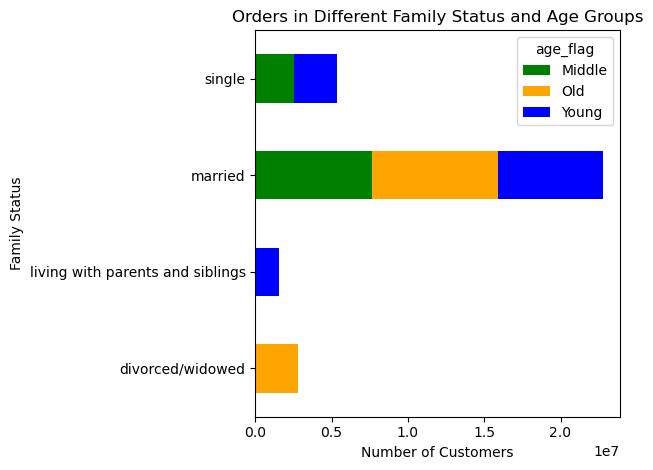

In [128]:
# Plot the data using a bar chart
colors = ['green', 'orange', 'blue']
bar_fam_age = df_grouped_fam_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Orders in Different Family Status and Age Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()

In [129]:
# Export the chart outside of Jupyter in the form of image file
bar_fam_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_age.png'))

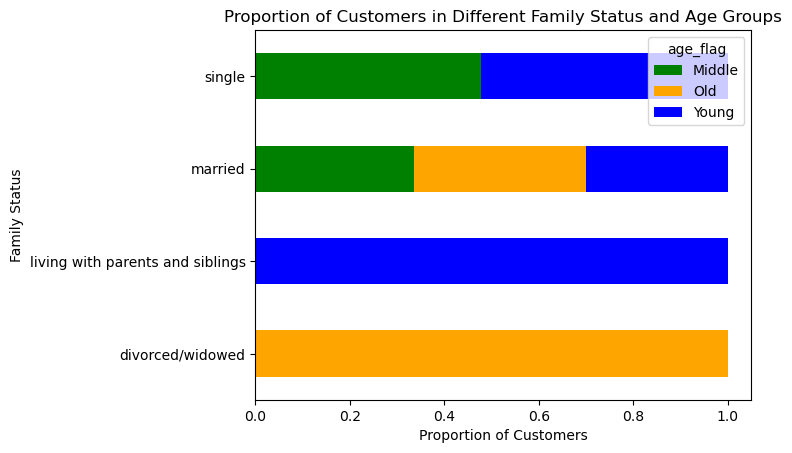

In [130]:
# To analyze the proportions 
df_prop_grouped_fam_age = df_grouped_fam_age.div(df_grouped_fam_age.sum(axis = 1), axis = 0)
bar_fam_age_prop = df_prop_grouped_fam_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Proportion of Customers in Different Family Status and Age Groups')
plt.xlabel('Proportion of Customers')
plt.ylabel('Family Status')

plt.show()

In [131]:
# Export the chart outside of Jupyter in the form of image file
bar_fam_age_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_age_prop.png'))

Checking the status between Age groups and Loyalty.

In [132]:
# Create a dataframe to group the data by 'age_flag' and 'loyalty_flag'
df_grouped_loyal_age = insta_filtered.groupby(['age_flag', 'loyalty_flag']).size().unstack()

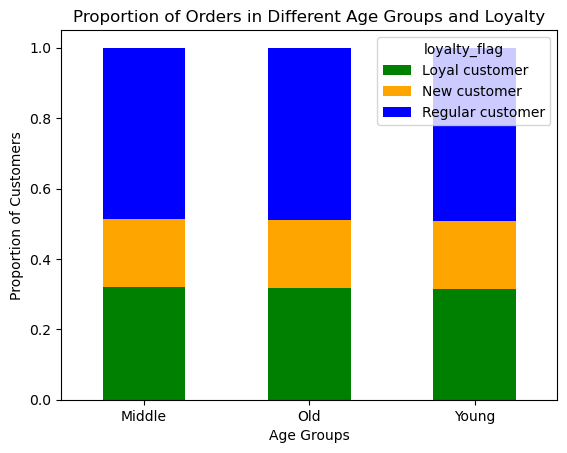

In [133]:
# To analyze the proportions in a bar chart
colors = ['green', 'orange', 'blue']
df_prop_grouped_loyal_age = df_grouped_loyal_age.div(df_grouped_loyal_age.sum(axis = 1), axis = 0)
bar_age_loyalty_prop = df_prop_grouped_loyal_age.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Proportion of Orders in Different Age Groups and Loyalty')
plt.xlabel('Age Groups')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.show()

In [134]:
# Export the chart outside of Jupyter in the form of image file
bar_age_loyalty_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty_prop.png'))